In [192]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

In [193]:
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [194]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [195]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

column_names = ["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"]
results = []

def k_to_f(k):
    return 9 / 5 * (k - 273) + 32

print("""
Beginning Data Retrieval     
-----------------------------
""")


# Build query URL
for index, city in enumerate(cities, start=1):
    print(f'Processing Record {index} of {len(cities)} | {city}')
    city_data = []
    query_url = f'{url}appid={api_key}&q={city}'
    weather_response = requests.get(query_url, city).json()
    
    if weather_response.get("cod") and weather_response.get("cod") == '404':
        print(f'{city} not found. Skipping...')
        continue
    
    try:
        city_data.append(city)                                           # Append City name 
        city_data.append(weather_response["coord"]["lat"])               # Append City Lat
        city_data.append(weather_response["coord"]["lon"])               # Append City Long
        city_data.append(k_to_f(weather_response["main"]["temp_max"]))   # Append Max Temp
        city_data.append(weather_response["main"]["humidity"])           # Append Hummidity
        city_data.append(weather_response["clouds"]["all"])   # Append Cloudiness
        city_data.append(weather_response["wind"]["speed"])              # Append Wind Speed
        city_data.append(weather_response["sys"]["country"])             # Append Country
        city_data.append(weather_response["dt"])                         # Append Date
        # Append city data to full data
        results.append(city_data)
        
    except:
        print(f'Unexpected issue with {city}: {weather_response}')


Beginning Data Retrieval     
-----------------------------

Processing Record 1 of 616 | roald
Processing Record 2 of 616 | kula
Processing Record 3 of 616 | norman wells
Processing Record 4 of 616 | yaan
Processing Record 5 of 616 | hithadhoo
Processing Record 6 of 616 | fonte boa
Processing Record 7 of 616 | cape town
Processing Record 8 of 616 | cherskiy
Processing Record 9 of 616 | punta arenas
Processing Record 10 of 616 | ushuaia
Processing Record 11 of 616 | eldorado
Processing Record 12 of 616 | illoqqortoormiut
illoqqortoormiut not found. Skipping...
Processing Record 13 of 616 | esperance
Processing Record 14 of 616 | coahuayana
Processing Record 15 of 616 | jamestown
Processing Record 16 of 616 | avera
Processing Record 17 of 616 | vallenar
Processing Record 18 of 616 | lorengau
Processing Record 19 of 616 | amatitan
Processing Record 20 of 616 | turochak
Processing Record 21 of 616 | te anau
Processing Record 22 of 616 | asau
Processing Record 23 of 616 | le port
Processi

Processing Record 193 of 616 | palmer
Processing Record 194 of 616 | nishihara
Processing Record 195 of 616 | nieves
Processing Record 196 of 616 | diamantino
Processing Record 197 of 616 | sentyabrskiy
sentyabrskiy not found. Skipping...
Processing Record 198 of 616 | ypsonas
Processing Record 199 of 616 | chivay
Processing Record 200 of 616 | meulaboh
Processing Record 201 of 616 | sosnovo-ozerskoye
Processing Record 202 of 616 | vaitupu
vaitupu not found. Skipping...
Processing Record 203 of 616 | hilo
Processing Record 204 of 616 | tiksi
Processing Record 205 of 616 | los llanos de aridane
Processing Record 206 of 616 | atambua
Processing Record 207 of 616 | namibe
Processing Record 208 of 616 | sataua
sataua not found. Skipping...
Processing Record 209 of 616 | port hardy
Processing Record 210 of 616 | kencong
Processing Record 211 of 616 | upernavik
Processing Record 212 of 616 | ostrovnoy
Processing Record 213 of 616 | launceston
Processing Record 214 of 616 | uige
Processing Re

Processing Record 378 of 616 | kiruna
Processing Record 379 of 616 | huarmey
Processing Record 380 of 616 | safaga
Processing Record 381 of 616 | college
Processing Record 382 of 616 | zaranj
Processing Record 383 of 616 | kargopol
Processing Record 384 of 616 | kloulklubed
Processing Record 385 of 616 | calafat
Processing Record 386 of 616 | puerto madryn
Processing Record 387 of 616 | aykhal
Processing Record 388 of 616 | kahului
Processing Record 389 of 616 | pierre
Processing Record 390 of 616 | ixtapa
Processing Record 391 of 616 | aksarka
Processing Record 392 of 616 | slyudyanka
Processing Record 393 of 616 | salalah
Processing Record 394 of 616 | vetapalem
Processing Record 395 of 616 | karratha
Processing Record 396 of 616 | coquimbo
Processing Record 397 of 616 | perth
Processing Record 398 of 616 | meadow lake
Processing Record 399 of 616 | umm kaddadah
Processing Record 400 of 616 | samarai
Processing Record 401 of 616 | lazurne
Processing Record 402 of 616 | kenai
Processi

Processing Record 567 of 616 | anadyr
Processing Record 568 of 616 | ginda
Processing Record 569 of 616 | saryshagan
saryshagan not found. Skipping...
Processing Record 570 of 616 | kayes
Processing Record 571 of 616 | flinders
Processing Record 572 of 616 | husavik
Processing Record 573 of 616 | gimli
Processing Record 574 of 616 | laguna
Processing Record 575 of 616 | broken hill
Processing Record 576 of 616 | margate
Processing Record 577 of 616 | namatanai
Processing Record 578 of 616 | chumikan
Processing Record 579 of 616 | bismarck
Processing Record 580 of 616 | bonavista
Processing Record 581 of 616 | aleksandrovskoye
Processing Record 582 of 616 | mopipi
Processing Record 583 of 616 | sotouboua
Processing Record 584 of 616 | timiryazevskoye
Processing Record 585 of 616 | svetlogorsk
Processing Record 586 of 616 | kankan
Processing Record 587 of 616 | tokmak
Processing Record 588 of 616 | nurota
Processing Record 589 of 616 | tambopata
Processing Record 590 of 616 | belyy yar
P

In [203]:
# Converting to dataframe 
df = pd.DataFrame(results, columns=column_names)

In [204]:
# Export into csv 
df.to_csv(output_data_file, index=False)

# show dataframe 
df 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,roald,62.58,6.13,60.278,87,45,1.91,NO,1596145334
1,kula,38.55,28.65,77.270,10,0,25.93,TR,1596145321
2,norman wells,65.28,-126.83,73.670,56,75,4.60,CA,1596145334
3,yaan,7.38,8.57,73.454,95,100,3.43,NG,1596145335
4,hithadhoo,-0.60,73.08,83.138,76,95,3.48,MV,1596145335
...,...,...,...,...,...,...,...,...,...
554,kamthi,21.23,79.20,79.070,94,40,1.91,IN,1596145558
555,xuchang,34.02,113.82,73.670,100,2,2.00,CN,1596145558
556,banjar,-8.19,114.97,77.270,100,40,4.60,ID,1596145559
557,tsubata,36.67,136.73,79.268,99,53,3.55,JP,1596145559


In [205]:
# Cities with humidity > 100 to remove 
drop_rows = df.loc[df['Humidity'] > 100].index

# Delete these row indexes from dataFrame
cleaned = df.drop(drop_rows, inplace=False)

# # Showing df after dropping rows 
cleaned

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,roald,62.58,6.13,60.278,87,45,1.91,NO,1596145334
1,kula,38.55,28.65,77.270,10,0,25.93,TR,1596145321
2,norman wells,65.28,-126.83,73.670,56,75,4.60,CA,1596145334
3,yaan,7.38,8.57,73.454,95,100,3.43,NG,1596145335
4,hithadhoo,-0.60,73.08,83.138,76,95,3.48,MV,1596145335
...,...,...,...,...,...,...,...,...,...
554,kamthi,21.23,79.20,79.070,94,40,1.91,IN,1596145558
555,xuchang,34.02,113.82,73.670,100,2,2.00,CN,1596145558
556,banjar,-8.19,114.97,77.270,100,40,4.60,ID,1596145559
557,tsubata,36.67,136.73,79.268,99,53,3.55,JP,1596145559


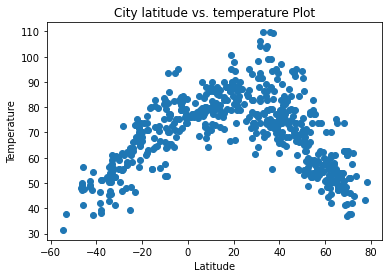

In [206]:
# Generate scatter lopt for Latitude vs. Temperature
lat_temp = cleaned.loc[:,['Lat', 'Max Temp']]

x= lat_temp['Lat']; y = lat_temp['Max Temp'];
plt.scatter(x,y)
plt.title("City latitude vs. temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

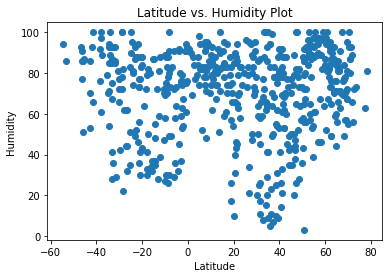

In [207]:
# Generate scatter lopt for  Latitude vs. Humidity Plot
lat_hum = cleaned.loc[:,['Lat', 'Humidity']]

x= lat_hum['Lat']; y = lat_hum['Humidity'];
plt.scatter(x,y)
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity ")
plt.show()

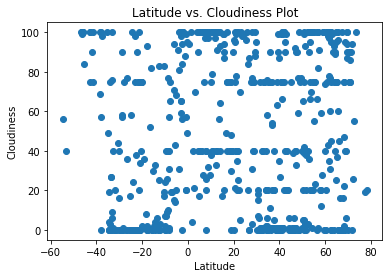

In [209]:
# Generate scatter lopt for Latitude vs. Cloudiness Plot
lat_clo = cleaned.loc[:,['Lat', 'Cloudiness']]

x= lat_clo['Lat']; y = lat_clo['Cloudiness'];
plt.scatter(x,y)
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

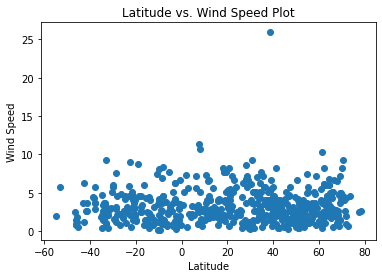

In [210]:
# Generate scatter lopt for Latitude vs. Wind Speed Plot
lat_win = cleaned.loc[:,['Lat', 'Wind Speed']]

x= lat_win['Lat']; y = lat_win['Wind Speed'];
plt.scatter(x,y)
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()